In [1]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

# visualisasi
from sklearn import tree
from six import StringIO
from IPython.display import Image

In [2]:
bank = pd.read_csv("bankdata.csv")
bank.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [3]:
# ganti nama kolom
bank = bank.rename(columns={'emp.var.rate':'evr', 'cons.price.idx':'cpi', 'cons.conf.idx':'cci', 'nr.employed':'employees', 'y':'deposit'})

In [4]:
bank.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,evr,cpi,cci,euribor3m,employees,deposit
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          4119 non-null   int64  
 1   job          4119 non-null   object 
 2   marital      4119 non-null   object 
 3   education    4119 non-null   object 
 4   default      4119 non-null   object 
 5   housing      4119 non-null   object 
 6   loan         4119 non-null   object 
 7   contact      4119 non-null   object 
 8   month        4119 non-null   object 
 9   day_of_week  4119 non-null   object 
 10  duration     4119 non-null   int64  
 11  campaign     4119 non-null   int64  
 12  pdays        4119 non-null   int64  
 13  previous     4119 non-null   int64  
 14  poutcome     4119 non-null   object 
 15  evr          4119 non-null   float64
 16  cpi          4119 non-null   float64
 17  cci          4119 non-null   float64
 18  euribor3m    4119 non-null   float64
 19  employ

In [6]:
# mengubah data string menjadi integer
bank['deposit'].replace({'no': 0, 'yes':1}, inplace=True)

In [7]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,evr,cpi,cci,euribor3m,employees,deposit
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [8]:
# menghitung jumlah respon tiap label
bank['deposit'].value_counts()

0    3668
1     451
Name: deposit, dtype: int64

jumlah pelanggan yang tidak memiliki deposito jauh lebih banyak daripada yang memiliki, sehingga data tidak imbang

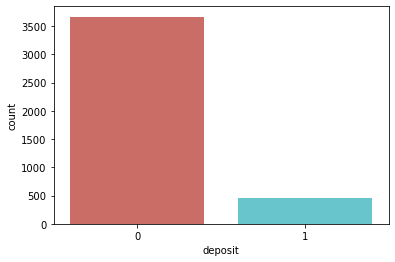

<Figure size 432x288 with 0 Axes>

In [9]:
sns.countplot(x='deposit', data=bank, palette='hls')
plt.show()
plt.savefig('count_plot')

In [10]:
# menghitung persentase dari data
count_no_dep = len(bank[bank['deposit']==0])
count_dep = len(bank[bank['deposit']==1])
pct_of_no_dep = count_no_dep/(count_no_dep+count_dep)
print ('persentase dari yang tidak memiliki deposito adalah', pct_of_no_dep*100)
pct_of_dep = count_dep/(count_no_dep+count_dep)
print ('persentase dari yang memiliki deposito adalah', pct_of_dep*100)

persentase dari yang tidak memiliki deposito adalah 89.0507404709881
persentase dari yang memiliki deposito adalah 10.949259529011895


hasil penghitungan persentase menggambarkan bahwa konsumen yang tidak memiliki deposito hampir 9x lipat dari pada konsumen yang memiliki deposito

## Eksplorasi dan visualisasi data

In [11]:
yes = bank[bank.deposit==1]
yes.shape

(451, 21)

In [12]:
no = bank[bank.deposit==0]
no.shape

(3668, 21)

### nilai rata-rata tiap kolom

In [13]:
bank.groupby('deposit').mean()

,age,duration,campaign,pdays,previous,evr,cpi,cci,euribor3m,employees
deposit,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


Dari tabel di atas, terdapat beberapa kesimpulan:

1. **usia**: usia konsumen yang tidak memiliki deposito (39.9) lebih rendah daripada yang  memiliki deposito (41.9)
2. **campaign**: orang-orang yang tidak memiliki deposito lebih sering dikontak selama promosi (2,6) dibandingkan dengan yang memiliki deposito (1,98)
3. **previous**: orang-orang yang memiliki deposito lebih sering dikontak sebelum promosi (0,58) dibandingkan dengan yang tidak memiliki deposito (0,14)

In [14]:
bank['job'].unique()

array(['blue-collar', 'services', 'admin.', 'entrepreneur',
       'self-employed', 'technician', 'management', 'student', 'retired',
       'housemaid', 'unemployed', 'unknown'], dtype=object)

In [15]:
bank['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [16]:
bank['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [17]:
# data kolom pendidikan disederhanakan
bank['education']=np.where(bank['education'] == 'basic.9y', 'Basic', bank['education'])
bank['education']=np.where(bank['education'] == 'basic.6y', 'Basic', bank['education'])
bank['education']=np.where(bank['education'] == 'basic.4y', 'Basic', bank['education'])

In [18]:
bank['education'].unique()

array(['Basic', 'high.school', 'university.degree', 'professional.course',
       'unknown', 'illiterate'], dtype=object)

Text(0, 0.5, 'Proportion of Customers')

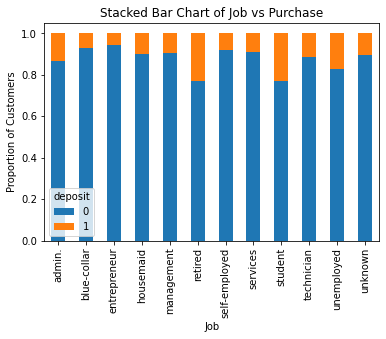

In [19]:
table1=pd.crosstab(bank.job,bank.deposit)
table1.div(table1.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Job vs Purchase')
plt.xlabel('Job')
plt.ylabel('Proportion of Customers')

dari grafik di atas, fitur job dapat menjadi prediktor yang baik

Text(0, 0.5, 'Proportion of Customers')

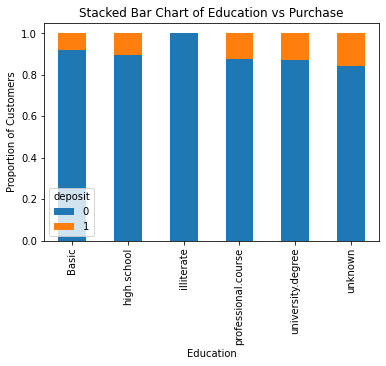

In [20]:
table2=pd.crosstab(bank.education,bank.deposit)
table2.div(table2.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')

dari grafik di atas, fitur education dapat menjadi prediktor yang baik

Text(0, 0.5, 'Proportion of Customers')

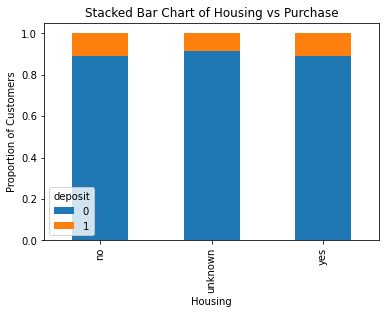

In [21]:
table3=pd.crosstab(bank.housing,bank.deposit)
table3.div(table3.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Housing vs Purchase')
plt.xlabel('Housing')
plt.ylabel('Proportion of Customers')

dari grafik di atas, fitur housing tidak dapat menjadi prediktor yang baik karena setiap kelompok pelanggan menunjukkan proporsi yang tidak jauh berbeda

Text(0, 0.5, 'Proportion of Customers')

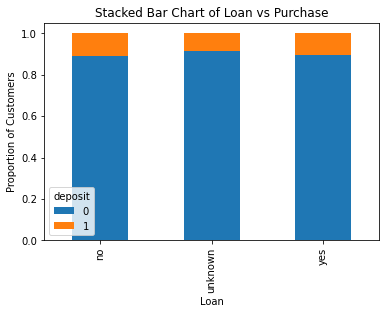

In [22]:
table4=pd.crosstab(bank.loan,bank.deposit)
table4.div(table4.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Loan vs Purchase')
plt.xlabel('Loan')
plt.ylabel('Proportion of Customers')

dari grafik di atas, fitur loan juga tidak dapat menjadi prediktor yang baik karena setiap kelompok pelanggan menunjukkan proporsi yang tidak jauh berbeda

Text(0, 0.5, 'Proportion of Customers')

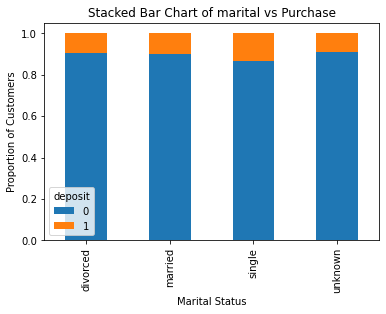

In [23]:
table5=pd.crosstab(bank.marital,bank.deposit)
table5.div(table5.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of marital vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

dari grafik di atas, fitur marital juga tidak dapat menjadi prediktor yang baik karena setiap kelompok pelanggan menunjukkan proporsi yang tidak jauh berbeda

Text(0, 0.5, 'Proportion of Customers')

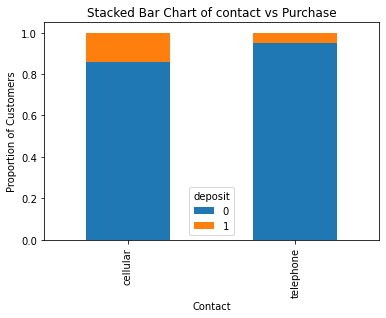

In [24]:
table6=pd.crosstab(bank.contact,bank.deposit)
table6.div(table6.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of contact vs Purchase')
plt.xlabel('Contact')
plt.ylabel('Proportion of Customers')

dari grafik di atas, fitur contact dapat menjadi prediktor yang baik

#### dari hasil ekplorasi data, terlihat bahwa sejumlah fitur dapat menjadi prediktor yang baik terhadap variabel outcome. 

#### fitur-fitur tersebut adalah:
1. campaign
2. previous
3. education
4. contact

In [25]:
# menetapkan keempat fitur di atas menjadi fitur yang akan dianalisis
bank2 = bank[['campaign', 'previous', 'education', 'contact']]
bank2.head()

,campaign,previous,education,contact
0,2,0,Basic,cellular
1,4,0,high.school,telephone
2,1,0,high.school,telephone
3,3,0,Basic,telephone
4,1,0,university.degree,cellular


In [26]:
# membuat dummy variables untuk fitur-fitur yang bersifat object
education_dummies = pd.get_dummies(bank2.education, prefix='education')
contact_dummies = pd.get_dummies(bank2.contact, prefix='contact')

In [27]:
# menggabungkan variabel dummy ke dalam dataframe
bank_with_dummies = pd.concat([bank2, education_dummies, contact_dummies], axis='columns')

In [28]:
bank_with_dummies.head()

,campaign,previous,education,contact,education_Basic,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,contact_cellular,contact_telephone
0,2,0,Basic,cellular,1,0,0,0,0,0,1,0
1,4,0,high.school,telephone,0,1,0,0,0,0,0,1
2,1,0,high.school,telephone,0,1,0,0,0,0,0,1
3,3,0,Basic,telephone,1,0,0,0,0,0,0,1
4,1,0,university.degree,cellular,0,0,0,0,1,0,1,0


In [29]:
# menghapus kolom yang sudah tidak dibutuhkan
bank3 = bank_with_dummies.drop(['education', 'contact'], axis='columns')
bank3.head()

,campaign,previous,education_Basic,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,contact_cellular,contact_telephone
0,2,0,1,0,0,0,0,0,1,0
1,4,0,0,1,0,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0,1
3,3,0,1,0,0,0,0,0,0,1
4,1,0,0,0,0,0,1,0,1,0


In [30]:
X = bank3
X.head()

,campaign,previous,education_Basic,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,contact_cellular,contact_telephone
0,2,0,1,0,0,0,0,0,1,0
1,4,0,0,1,0,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0,1
3,3,0,1,0,0,0,0,0,0,1
4,1,0,0,0,0,0,1,0,1,0


In [31]:
# menetapkan variabel deposit sebagai target
y = bank.deposit

In [32]:
# menetapkan pembagian antara data train dan data test, dengan proporsi 70%:30% untuk menjadi data yang akan dianalisis lebih lanjut
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=0)

# Logistic Regression

In [33]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [34]:
# membentuk model
model.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [35]:
# memprediksi model
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
# skor akurasi model Logistic Regression
model.score(X_test,y_test)
print('Tingkat akurasi regresi logistik dari data tes: {:,.2f}'.format(model.score(X_test,y_test)))

Tingkat akurasi regresi logistik dari data tes: 0.90


In [37]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95      1114
           1       0.45      0.04      0.08       122

    accuracy                           0.90      1236
   macro avg       0.68      0.52      0.51      1236
weighted avg       0.86      0.90      0.86      1236



In [39]:
model.classes_

array([0, 1], dtype=int64)

In [40]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[1108    6]
 [ 117    5]]


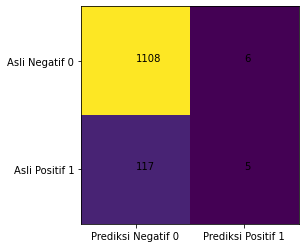

In [41]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(cm)

ax.xaxis.set(ticks=(0,1), ticklabels=('Prediksi Negatif 0', 'Prediksi Positif 1'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Asli Negatif 0', 'Asli Positif 1'))

for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j])

#### Sensitivity

true positif = 11; total positif = 271; sensitivity = 19/274 = 0.04

#### Specificity

true negatif = 2194; total negatif = 2201; specificity = 2192/2198 = 0.996

#### Precision

true positif + false positif = 11 + 7 = 18; rasio = 11/18 = 0.61

In [42]:
model.predict_proba(X_test)

array([[0.95504673, 0.04495327],
       [0.87131936, 0.12868064],
       [0.94839272, 0.05160728],
       ...,
       [0.85816423, 0.14183577],
       [0.93841509, 0.06158491],
       [0.74695311, 0.25304689]])

# K-Nearest Neighbors

In [43]:
#menetapkan 3 neighbors dalam model
modelK = KNeighborsClassifier(n_neighbors=3)

#membuat model
modelK.fit(X_test, y_test)

#memprediksi model
predicted = modelK.predict(X_test)

#skor akurasi model
modelK.score(X_test, y_test)

0.8940129449838188

In [44]:
#menetapkan 5 neighbors dalam model
modelK5 = KNeighborsClassifier(n_neighbors=5)

#membuat model
modelK5.fit(X_test, y_test)

#memprediksi model
predicted = modelK5.predict(X_test)

#tingkat akurasi model
modelK5.score(X_test, y_test)

0.9004854368932039

tingkat akurasi model sedikit meningkat dengan menggunakan 5 neighbors

In [45]:
# mencoba menguji model dengan jumlah neighbors 1-25
score_akurasi = []

for i in range(1,25):
    modelkn = KNeighborsClassifier(n_neighbors=i)
    modelkn.fit(X_train, y_train)
    y_predk = modelkn.predict(X_test)
    scorekn = modelkn.score(X_test, y_test)
    score_akurasi.append(scorekn)

Text(0, 0.5, 'Akurasi model')

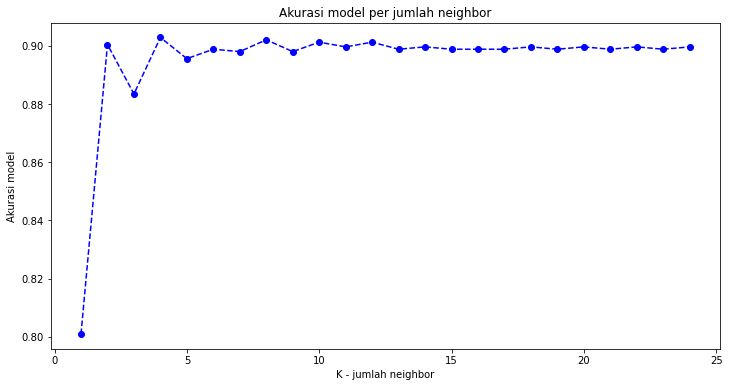

In [46]:
# membuat plot model
plt.figure(figsize=(12,6))
plt.plot(range(1,25),
        score_akurasi,
        color='blue',
        linestyle='dashed',
        marker='o',
        markerfacecolor='blue')

plt.title('Akurasi model per jumlah neighbor')
plt.xlabel('K - jumlah neighbor')
plt.ylabel('Akurasi model')

dari plot di atas dapat disimpulkan bahwa nilai akurasi tertinggi dicapai pada jumlah neighbors = 4

In [47]:
#menetapkan 4 neighbors dalam model
modelK4 = KNeighborsClassifier(n_neighbors=4)

#membuat model
modelK4.fit(X_test, y_test)

#memprediksi model
predicted4 = modelK4.predict(X_test)

#tingkat akurasi model
modelK4.score(X_test, y_test)

0.901294498381877

# Support Vector Machine

In [48]:
modelsvm = SVC(kernel='linear')

#membuat model
modelsvm.fit(X_train, y_train)

SVC(kernel='linear')

In [49]:
#memprediksi model
y_predsvm = modelsvm.predict(X_test)

In [50]:
print('skor', accuracy_score(y_test, y_predsvm))
print('Classification Report')
print(classification_report(y_test, y_predsvm, zero_division=1))
print('Confusion Matrix')
print(confusion_matrix(y_test, y_predsvm))

skor 0.901294498381877
Classification Report
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1114
           1       1.00      0.00      0.00       122

    accuracy                           0.90      1236
   macro avg       0.95      0.50      0.47      1236
weighted avg       0.91      0.90      0.85      1236

Confusion Matrix
[[1114    0]
 [ 122    0]]


# Decision Tree

In [51]:
modeldt = DecisionTreeClassifier()
modeldt.fit(X_train, y_train)

y_preddt = modeldt.predict(X_test)

In [52]:
y_preddt

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
print(accuracy_score(y_test, y_preddt))

0.8972491909385113


In [54]:
print(classification_report(y_test, y_preddt))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1114
           1       0.38      0.07      0.11       122

    accuracy                           0.90      1236
   macro avg       0.64      0.53      0.53      1236
weighted avg       0.85      0.90      0.86      1236



In [55]:
print(confusion_matrix(y_test, y_preddt))

[[1101   13]
 [ 114    8]]


In [56]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz/bin/'

In [57]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [58]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [59]:
import pydotplus

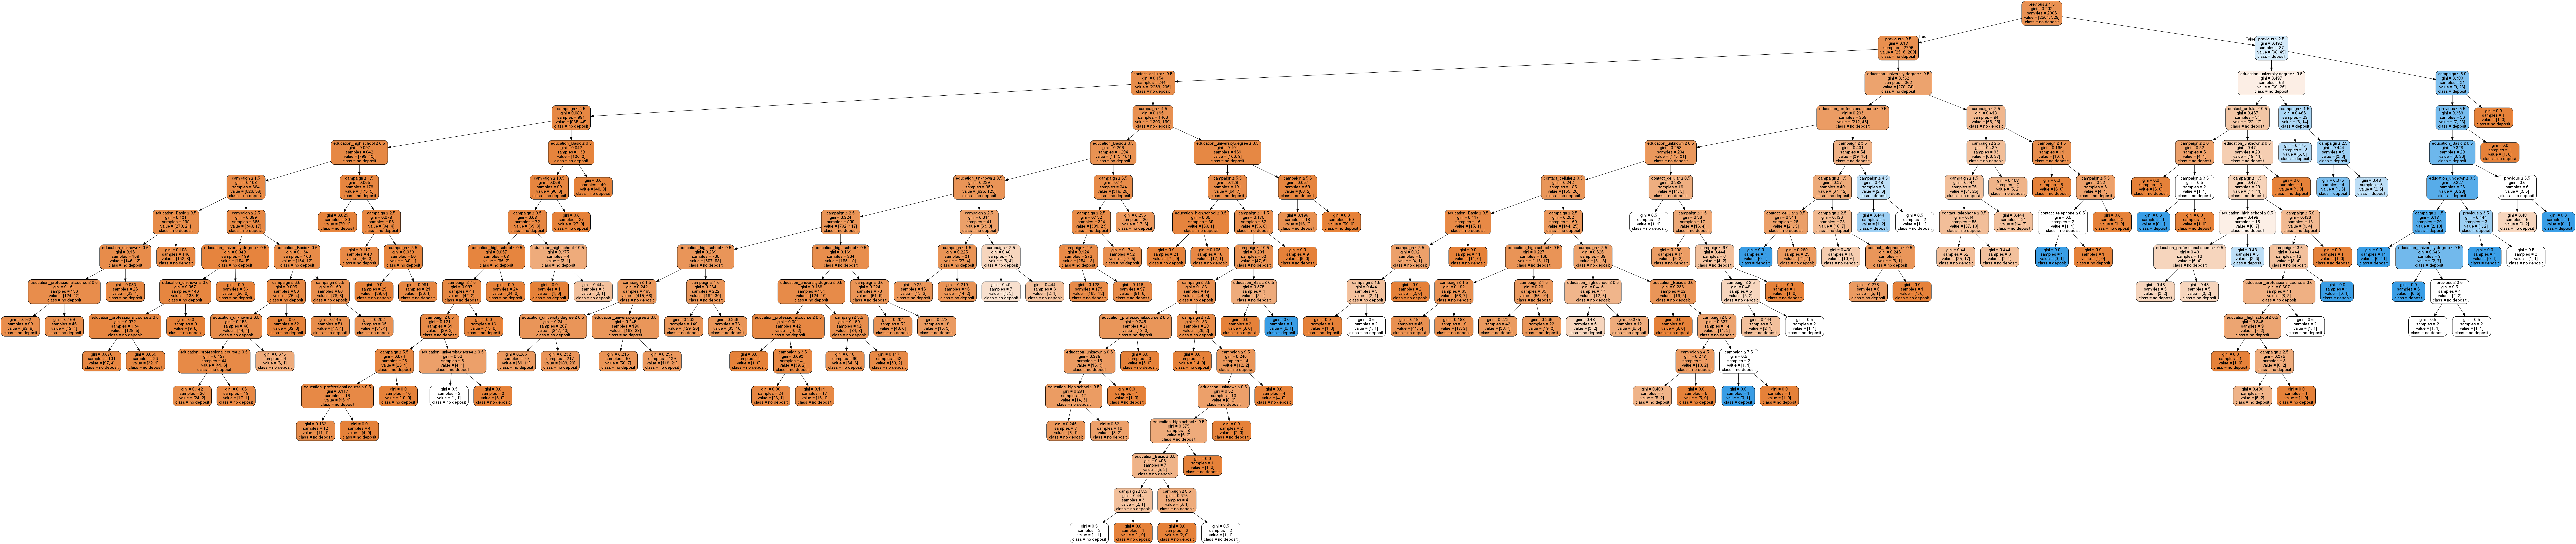

In [60]:
dot_data = StringIO()
tree.export_graphviz(modeldt,
                    out_file=dot_data,
                    class_names=['no deposit', 'deposit'],
                    feature_names=['campaign', 'previous', 'education_Basic', 
                                   'education_high.school', 'education_illiterate', 
                                   'education_professional.course', 'education_university.degree', 
                                   'education_unknown', 'contact_cellular', 'contact_telephone'],
                    filled=True,
                    rounded=True,
                    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [61]:
modeldt2 = DecisionTreeClassifier(criterion='entropy',
                                 max_depth=3)
modeldt2.fit (X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [62]:
y_preddt2 = modeldt2.predict(X_test)

print(accuracy_score(y_test, y_preddt2))

0.8996763754045307


In [63]:
print(classification_report(y_test,y_preddt2))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95      1114
           1       0.42      0.04      0.07       122

    accuracy                           0.90      1236
   macro avg       0.66      0.52      0.51      1236
weighted avg       0.86      0.90      0.86      1236



In [64]:
print(confusion_matrix(y_test,y_preddt2))

[[1107    7]
 [ 117    5]]


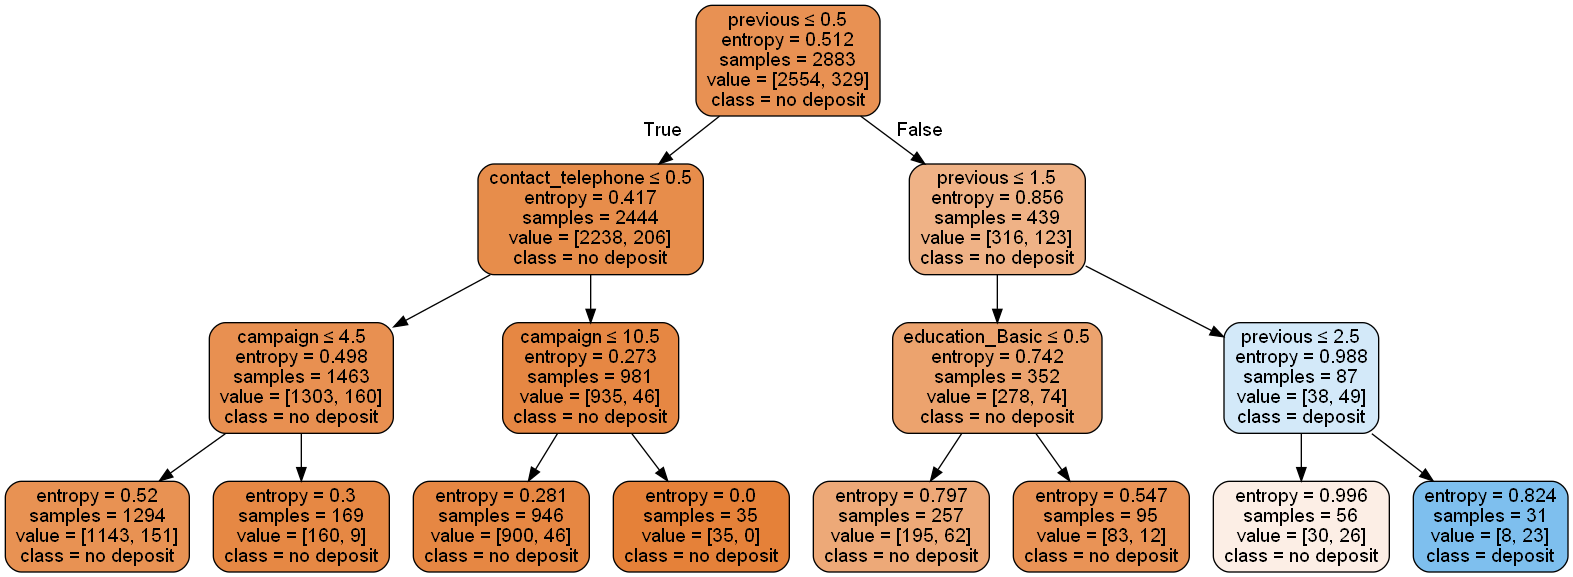

In [65]:
dot_data = StringIO()
tree.export_graphviz(modeldt2,
                    out_file=dot_data,
                    class_names=['no deposit', 'deposit'],
                    feature_names=['campaign', 'previous', 'education_Basic', 
                                   'education_high.school', 'education_illiterate', 
                                   'education_professional.course', 'education_university.degree', 
                                   'education_unknown', 'contact_cellular', 'contact_telephone'],
                    filled=True,
                    rounded=True,
                    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

dari grafik decision tree di atas, terlihat bahwa fitur previous dengan level 0,5 menjadi penentu utama dari keputusan yang dihasilkan

# Random Forest

In [66]:
modelrf = RandomForestClassifier()

# membuat model
modelrf.fit(X_train, y_train)

RandomForestClassifier()

In [67]:
# memprediksi model
y_predrf = modelrf.predict(X_test)

In [68]:
print('skor:', accuracy_score(y_test, y_predrf))
print('Classification Report')
print(classification_report(y_test,y_predrf))
print('Confusion Matrix')
print(confusion_matrix(y_test, y_predrf))

skor: 0.8948220064724919
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1114
           1       0.30      0.05      0.08       122

    accuracy                           0.89      1236
   macro avg       0.60      0.52      0.51      1236
weighted avg       0.84      0.89      0.86      1236

Confusion Matrix
[[1100   14]
 [ 116    6]]


In [69]:
# menghitung skor importance dari setiap fitur yang diuji
df_fitur = pd.DataFrame({'fitur':X,
                        'importance': modelrf.feature_importances_})
df_fitur

,fitur,importance
0,"(c, a, m, p, a, i, g, n)",0.309122
1,"(p, r, e, v, i, o, u, s)",0.468478
2,"(e, d, u, c, a, t, i, o, n, _, B, a, s, i, c)",0.035831
3,"(e, d, u, c, a, t, i, o, n, _, h, i, g, h, ., ...",0.023334
4,"(e, d, u, c, a, t, i, o, n, _, i, l, l, i, t, ...",0.000137
5,"(e, d, u, c, a, t, i, o, n, _, p, r, o, f, e, ...",0.023022
6,"(e, d, u, c, a, t, i, o, n, _, u, n, i, v, e, ...",0.029048
7,"(e, d, u, c, a, t, i, o, n, _, u, n, k, n, o, ...",0.018140
8,"(c, o, n, t, a, c, t, _, c, e, l, l, u, l, a, r)",0.046793
9,"(c, o, n, t, a, c, t, _, t, e, l, e, p, h, o, ...",0.046096


In [70]:
# mengurutkan nilai importance dari yang terbesar hingga terkecil
df_fitur.sort_values(by='importance', ascending=False, inplace=True)
df_fitur

,fitur,importance
1,"(p, r, e, v, i, o, u, s)",0.468478
0,"(c, a, m, p, a, i, g, n)",0.309122
8,"(c, o, n, t, a, c, t, _, c, e, l, l, u, l, a, r)",0.046793
9,"(c, o, n, t, a, c, t, _, t, e, l, e, p, h, o, ...",0.046096
2,"(e, d, u, c, a, t, i, o, n, _, B, a, s, i, c)",0.035831
6,"(e, d, u, c, a, t, i, o, n, _, u, n, i, v, e, ...",0.029048
3,"(e, d, u, c, a, t, i, o, n, _, h, i, g, h, ., ...",0.023334
5,"(e, d, u, c, a, t, i, o, n, _, p, r, o, f, e, ...",0.023022
7,"(e, d, u, c, a, t, i, o, n, _, u, n, k, n, o, ...",0.018140
4,"(e, d, u, c, a, t, i, o, n, _, i, l, l, i, t, ...",0.000137


<AxesSubplot:xlabel='importance', ylabel='fitur'>

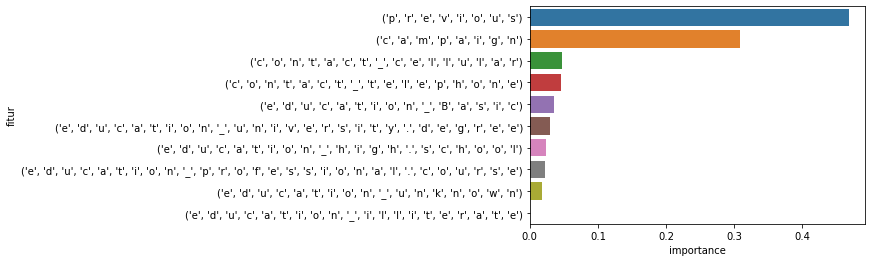

In [71]:
# membuat grafik importance
sns.barplot(y=df_fitur['fitur'],
           x=df_fitur['importance'])

# Naive Bayes

In [72]:
modelnaive = GaussianNB()

# membuat model
modelnaive.fit(X_train, y_train)

GaussianNB()

In [73]:
# memprediksi model
y_prednaive = modelnaive.predict(X_test)

In [74]:
print('score:', modelnaive.score(X_test, y_test))
print('acc score:', accuracy_score(y_test, y_prednaive))
print('Classification report')
print(classification_report(y_test, y_prednaive))
print('Confusion matrix')
print(confusion_matrix(y_test, y_prednaive))

score: 0.3762135922330097
acc score: 0.3762135922330097
Classification report
              precision    recall  f1-score   support

           0       0.96      0.32      0.48      1114
           1       0.12      0.89      0.22       122

    accuracy                           0.38      1236
   macro avg       0.54      0.60      0.35      1236
weighted avg       0.88      0.38      0.45      1236

Confusion matrix
[[357 757]
 [ 14 108]]


skor akurasi model yang dihasilkan sangat kecil (0.38), berbeda jauh dari metode-metode klasifikasi lainnya

# Rangkuman

In [75]:
print("Logistic Regression", accuracy_score(y_test,y_pred))
print("K-Nearest Neighbors", accuracy_score(y_test, predicted4))
print("SVM", accuracy_score(y_test, y_predsvm))
print("Decision tree", accuracy_score(y_test, y_preddt2))
print("Random forest", accuracy_score(y_test, y_predrf))
print("Naive Bayes", accuracy_score(y_test, y_prednaive))

Logistic Regression 0.9004854368932039
K-Nearest Neighbors 0.901294498381877
SVM 0.901294498381877
Decision tree 0.8996763754045307
Random forest 0.8948220064724919
Naive Bayes 0.3762135922330097


### Kesimpulan:

dari berbagai pendekatan klasifikasi yang telah dilakukan, K-Nearest Neighbors dengan k=4 dan SVM merupakan metode yang memiliki skor akurasi yang paling tinggi, sedangkan Naive Bayes menghasilkan nilai akurasi yang paling rendah. Dengan demikian, data dapat dengan lebih baik diprediksi melalui metode K-NN atuapun SVM.